# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>SMS/Email Spam Detection Neural Network</div></b>

## Project Overview

This project focuses on developing an intelligent SMS spam detection system utilizing deep learning techniques. The goal is to automatically classify incoming text messages as **spam** or **ham (legitimate messages)**, helping to reduce unwanted communication and improve user experience.

Using a publicly available SMS dataset, the project applies **natural language processing (NLP)** techniques combined with **neural network architectures**, including **LSTM-based Recurrent Neural Networks** and **feedforward neural networks with text vectorization**. The models learn patterns in message content to distinguish spam messages from legitimate ones accurately.

## Project Objectives

The key objectives of this project are:

1. **Preprocess and clean SMS text data** to remove redundancy and ensure high-quality inputs for modeling.
2. **Transform raw text into numerical representations** using tokenization, padding, and embedding techniques.
3. **Develop and train deep learning models** capable of capturing semantic and sequential patterns in text.
4. **Evaluate model performance** using accuracy, precision, recall, F1-score, and confusion matrices.
5. **Compare different neural network approaches** to understand performance trade-offs.
6. **Provide actionable insights and recommendations** for deploying an effective spam detection system.

---


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('spam.csv',encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Preprocessing

In [3]:
# drop redundant columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
1119,spam,"Bored of speed dating? Try SPEEDCHAT, txt SPEE..."
1682,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
4589,ham,Tomorrow i am not going to theatre. . . So i c...
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
1736,ham,I will come tomorrow di


In [4]:
# Rename columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)


In [5]:
# Preview first 5 row
df.head()

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initiate label encoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

5570    0
1881    0
1055    0
5432    0
3623    0
Name: message_type, dtype: int64

In [7]:
# Check for duplicate
df.duplicated().sum()

np.int64(403)

In [8]:
 df = df.drop_duplicates()

In [9]:
# Verify
df.duplicated().sum()

np.int64(0)

In [10]:
# check the final shape of data
df.shape

(5169, 2)

In [11]:
# Preview random sample of the data
df.sample()

,message_type,message
2190,0,"Ooh, 4got, i'm gonna start belly dancing in mo..."


## Train a Neural Network

In [12]:
# Extract features and labels
text_data = df['message']
labels = df['message_type']

# Split into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)

In [13]:
# sequence_lengths = [len(text.split()) for text in df['Review']] # Check 
# print(np.percentile(sequence_lengths, [50, 75, 90, 95, 99]))

max_features = 7880  # Number of words to consider as features
maxlen = 32  # Cut texts after this number of words

# Create a tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)

In [14]:
len(tokenizer.word_index) + 1

7880

In [15]:
# Convert text to sequence
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen)
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen)

## Recurrent Neural Network (RNN) Model

In [16]:
# Instantiate the RNN mdoel
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
model.fit(x_train_pad, y_train, epochs=5, batch_size=32, validation_data=(x_test_pad, y_test))

# Display the model architecture and parameter count
model.summary()

Epoch 1/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9116 - loss: 0.2670 - val_accuracy: 0.9758 - val_loss: 0.0749
Epoch 2/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9910 - loss: 0.0343 - val_accuracy: 0.9865 - val_loss: 0.0503
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9961 - loss: 0.0187 - val_accuracy: 0.9826 - val_loss: 0.0604
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.9787 - val_loss: 0.1011
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9807 - val_loss: 0.0641


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 32, 128)             │       1,008,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,421,061 (13.05 MB)

 Trainable params: 1,140,353 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,280,708 (8.70 MB)

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test accuracy: {accuracy:.3f}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9761 - loss: 0.0704
Test accuracy: 0.981


In [18]:
# Make predictions
predictions = model.predict(x_test_pad)
predicted_classes = (predictions > 0.5).astype("int32")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
# Get the classification report
print("Classification Report: ")
print(classification_report(y_test, predicted_classes))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



## Neural Network

In [12]:
# Import necessary components for building the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, GlobalAveragePooling1D
from tensorflow.keras.layers import Dense, Dropout, Embedding

# Extract features and labels
x = df['message'].values
y = df['message_type'].values

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# -----------Test Vectorization------------
# Add a TextVectorization layer to:
# - Tokenize the input text
# - Convert tokens to integer indices
# - Limit vocabulary to `max_words`
# - Ensure all sequences are of length `max_length`
max_words = 5000 # # Set the maximum number of unique words to consider (vocabulary size)
max_length = 35 # Set the maximum length of tokenized sequences (padding/truncating will be applied)
output_dim = 32 # Size of embedding vectors
     
vectorizer = TextVectorization(
    max_tokens=max_words, output_mode='int', output_sequence_length=max_length)
vectorizer.adapt(x_train)

# Initialize a sequential model
model = Sequential([
    vectorizer, # Text vectorization
    Embedding(input_dim=max_words, output_dim=output_dim), #  Embedding layer to map word indices to 32-dimensional dense vectors
    GlobalAveragePooling1D(), # Averages embedding across sequence
    Dense(128, activation='relu'), # hidden Dense layer with 128 neurons and ReLU activation
    Dropout(0.5),
    Dense(1, activation='sigmoid') # output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model using:
# - Binary cross-entropy loss for binary classification
# - Adam optimizer for training
# - Accuracy as the evaluation metric
model.compile(
    loss='binary_crossentropy',          # Suitable for binary labels
    optimizer='adam',                    # Adaptive optimizer
    metrics=['accuracy']                 # Track accuracy during training
)

# -------Train the Model-------
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=250
)

# Display the model architecture and parameter count
model.summary()


Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7978 - loss: 0.5890 - val_accuracy: 0.8733 - val_loss: 0.3232
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8749 - loss: 0.3259 - val_accuracy: 0.8733 - val_loss: 0.3108
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8661 - loss: 0.3195 - val_accuracy: 0.8733 - val_loss: 0.2960
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8713 - loss: 0.3004 - val_accuracy: 0.8733 - val_loss: 0.2871
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8753 - loss: 0.2841 - val_accuracy: 0.8723 - val_loss: 0.2740


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 35)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 35, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 493,061 (1.88 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328,708 (1.25 MB)

The model summary visualizes the neural network structure, including embedding layers, LSTM or pooling layers, dense layers, and parameter counts. It provides insight into model complexity, trainable parameters, and how textual input flows through the network to produce predictions.

---

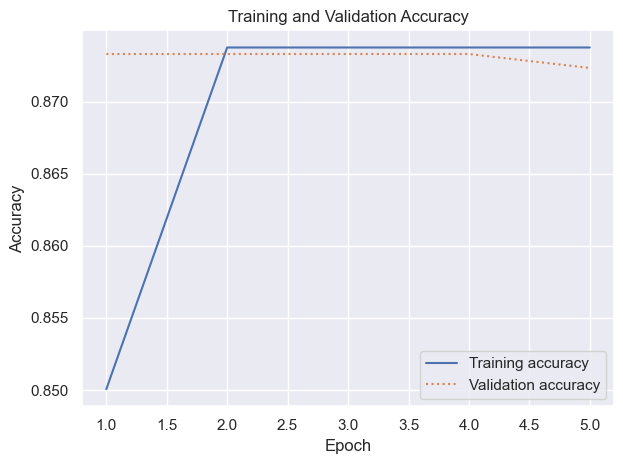

In [13]:
# Visualize the Training History

acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()


This visualization shows how the model’s accuracy evolves over training epochs for both the training and validation datasets. A steady increase in accuracy indicates effective learning, while the close alignment between training and validation curves suggests good generalization and minimal overfitting.

---

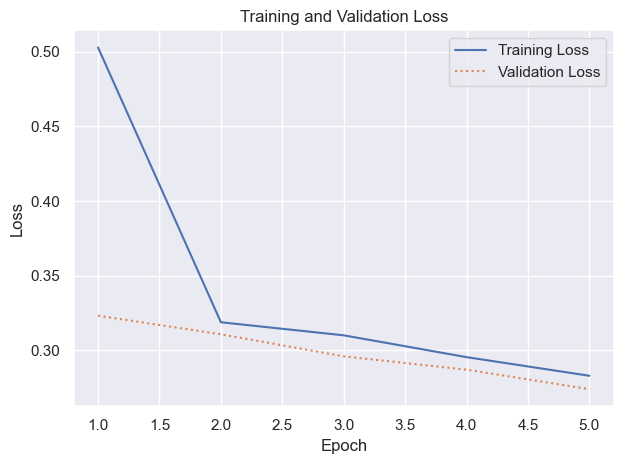

In [14]:
# Visualize the Training History
acc = history.history['loss']
val = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Loss plot
plt.plot(epochs, acc, '-', label='Training Loss')
plt.plot(epochs, val, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

This plot illustrates the reduction in loss during training. The downward trend in both training and validation loss demonstrates that the model is progressively minimizing prediction errors. The absence of a sharp divergence between the curves indicates stable training behavior.

---

### Model Evaluation on Validation Set

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report
              precision    recall  f1-score   support

        Spam       0.87      1.00      0.93       903
         Ham       0.00      0.00      0.00       131

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.76      0.87      0.81      1034



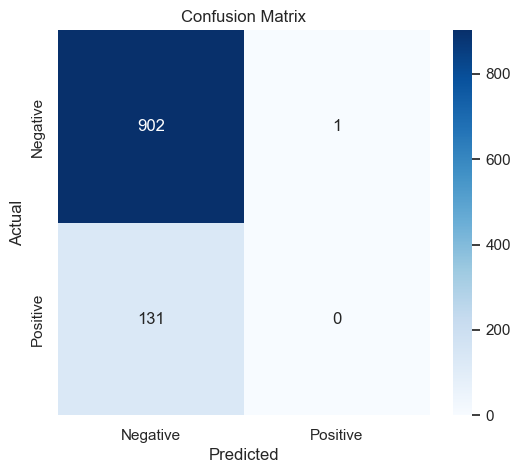

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert x_val to tensor
x_val_tf = tf.convert_to_tensor(x_val, dtype=tf.string)

# Predict on validations set
val_probs = model.predict(x_val_tf)
val_preds = (val_probs >=0.5).astype(int).flatten() # Binary threshold at 0.5

#-------True labels----------
true_labels = y_val

# Evaluation Metrics
print("Classification Report")
print(classification_report(true_labels, val_preds, target_names=["Spam", "Ham"]))

# Plot confusion matrix
cm = confusion_matrix(true_labels, val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


The confusion matrix provides a detailed breakdown of model predictions versus actual labels. It highlights how many spam and ham messages were correctly classified, as well as instances of misclassification. This visualization helps identify whether the model favors one class over another and reveals potential class imbalance issues.

---

## Key Results

* The **LSTM-based RNN model achieved approximately 98% test accuracy**, demonstrating strong performance in identifying spam messages.
* High **precision and recall for spam detection** indicate the model is effective at minimizing false positives and false negatives.
* The RNN model significantly outperformed the simpler feedforward neural network, particularly in capturing **contextual and sequential patterns** in text.
* The second neural network model showed **class imbalance issues**, where one class dominated predictions, highlighting the importance of evaluation beyond accuracy alone.
* Overall, deep learning models proved highly effective for text classification tasks when combined with appropriate preprocessing and embeddings.

---

## Recommendations

1. **Deploy the LSTM-based model** for production use, as it demonstrates superior performance and robustness in spam detection.
2. **Address class imbalance** in future iterations using techniques such as class weighting or resampling to improve minority class performance.
3. **Increase training epochs with early stopping** to further optimize performance without overfitting.
4. **Experiment with pretrained word embeddings** (e.g., GloVe or FastText) to enhance semantic understanding.
5. **Extend the system to email spam detection** or multilingual SMS datasets for broader real-world applicability.
6. **Monitor post-deployment performance** and retrain the model periodically to adapt to evolving spam patterns.

---